# Assignment 2

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_excel( 'flight_price.xlsx' )

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [4]:
# Obervation 
df.shape
# 10683 rows and 11 columns

(10683, 11)

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

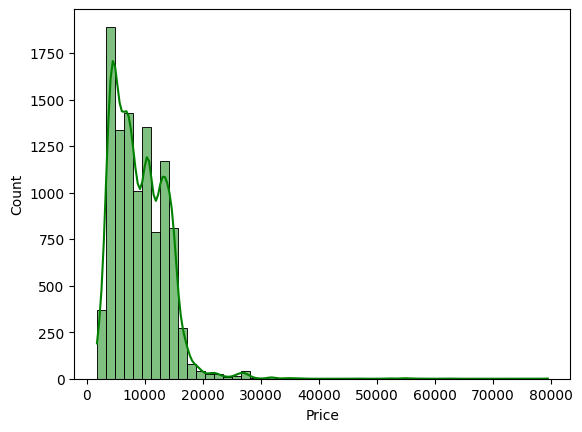

In [6]:
sns.histplot( data = df, x = 'Price', bins=50, kde=True, color='g' )

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

<Axes: xlabel='Airline', ylabel='Price'>

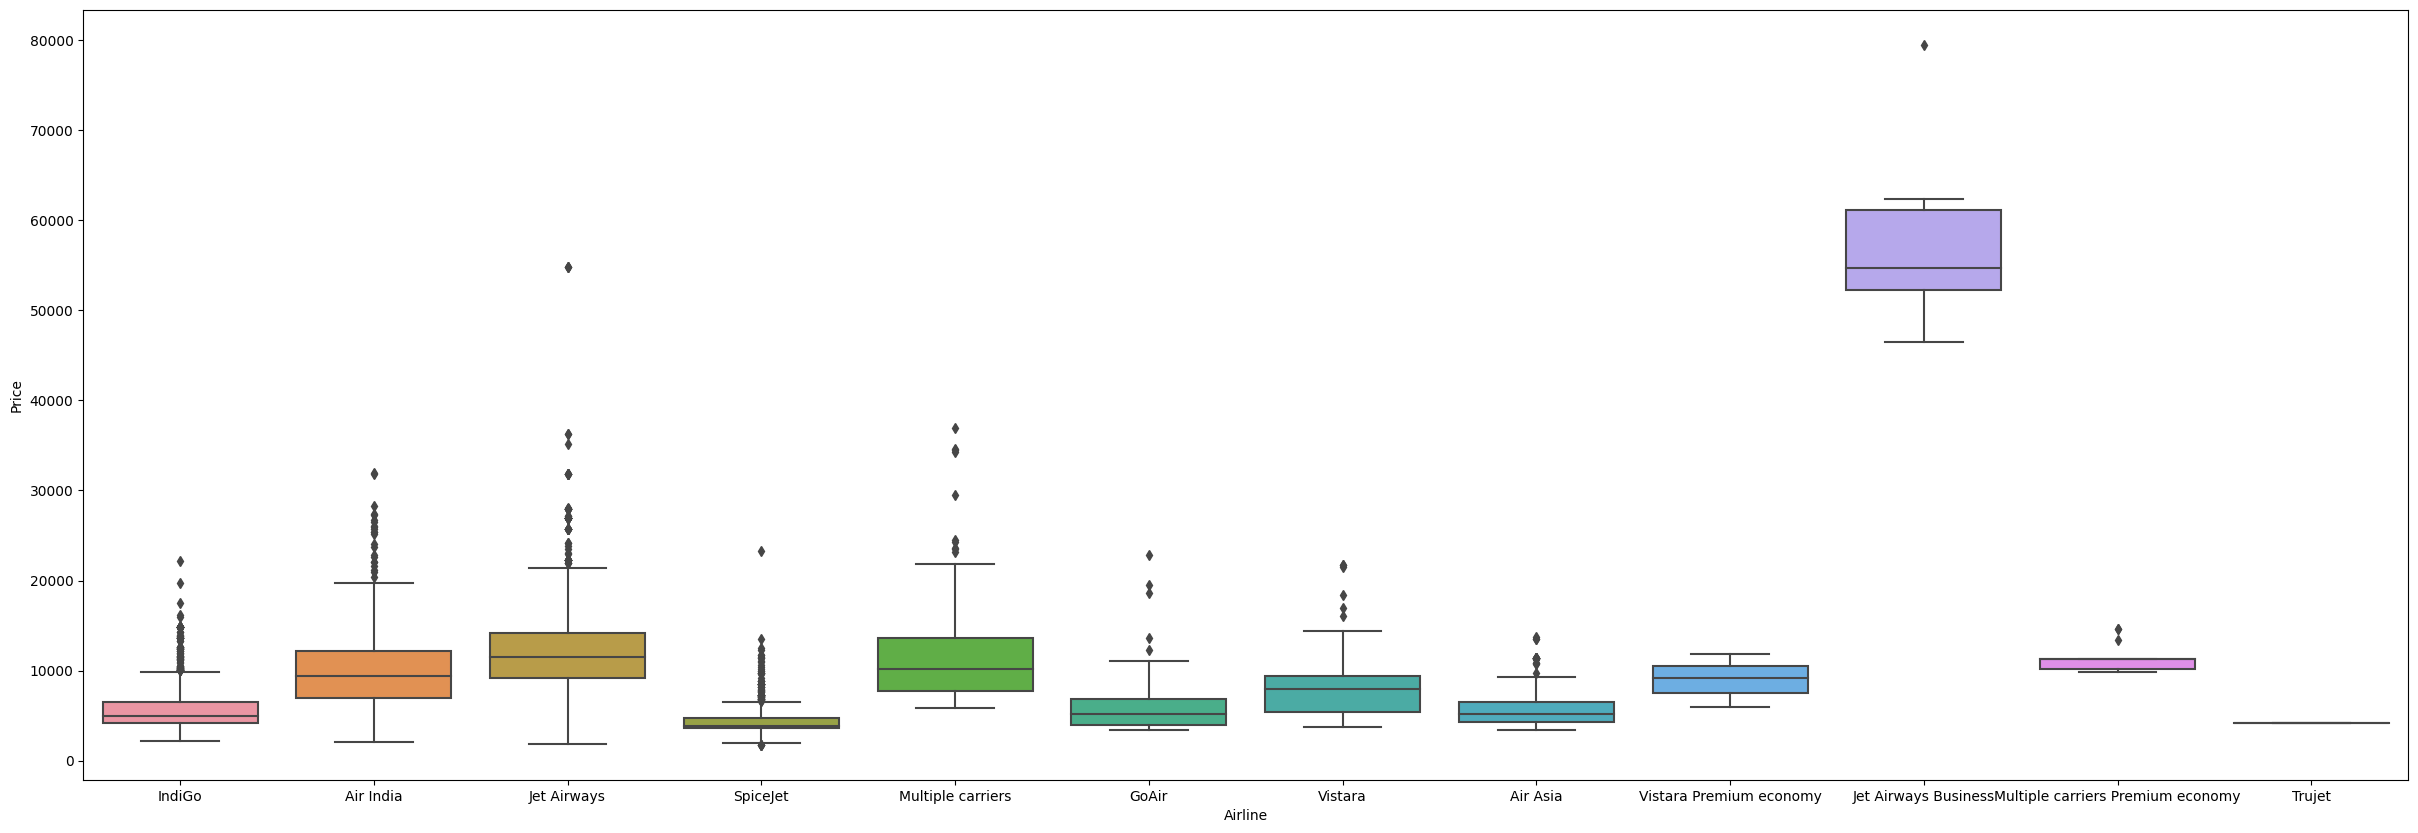

In [8]:
plt.figure( figsize=( 30, 10 ) )
sns.boxplot( data = df, x = 'Airline', y = 'Price' )

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

<Axes: ylabel='Price'>

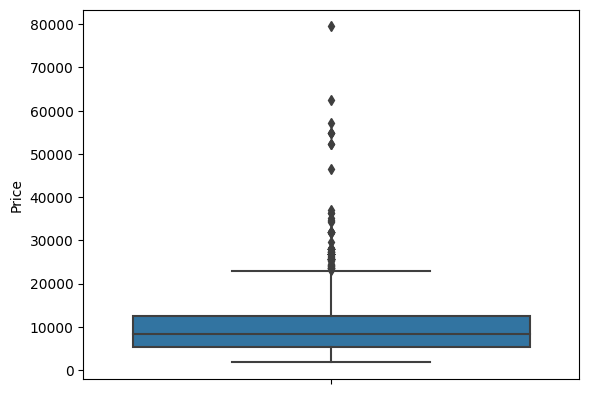

In [9]:
# Outlier detection in dataset 
sns.boxplot( data=df, y = 'Price' )
# In this case many outliers are detected 

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [10]:
# Peak season for travel by user 

# Extract Month from this dataset 
df[ 'Month' ] =  df[ 'Date_of_Journey' ].str.split( '/' ).str[ 1 ].astype( int )

<Axes: xlabel='Month', ylabel='Price'>

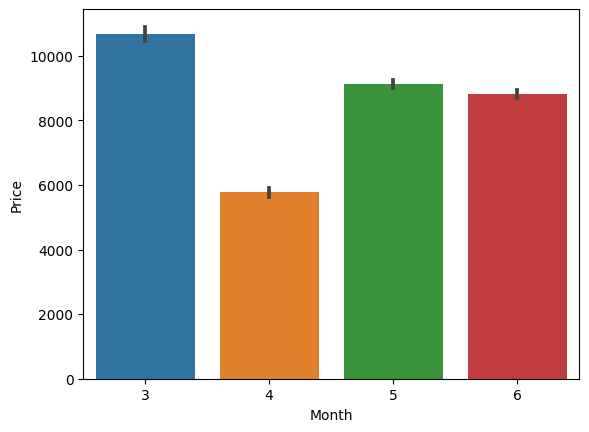

In [11]:
sns.barplot( data = df, x = 'Month', y = 'Price')

In [12]:
# Observation 
# In month 3 most person will travel 

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?


#1. By taking no of stops 

In [13]:
# Convert this stops to numerical 
df[ 'Total_Stops' ].dropna() 

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [14]:
df[ 'Total_Stops' ] = df[ 'Total_Stops' ].map( { 'non-stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, np.nan: 1 })

<Axes: xlabel='Month', ylabel='Price'>

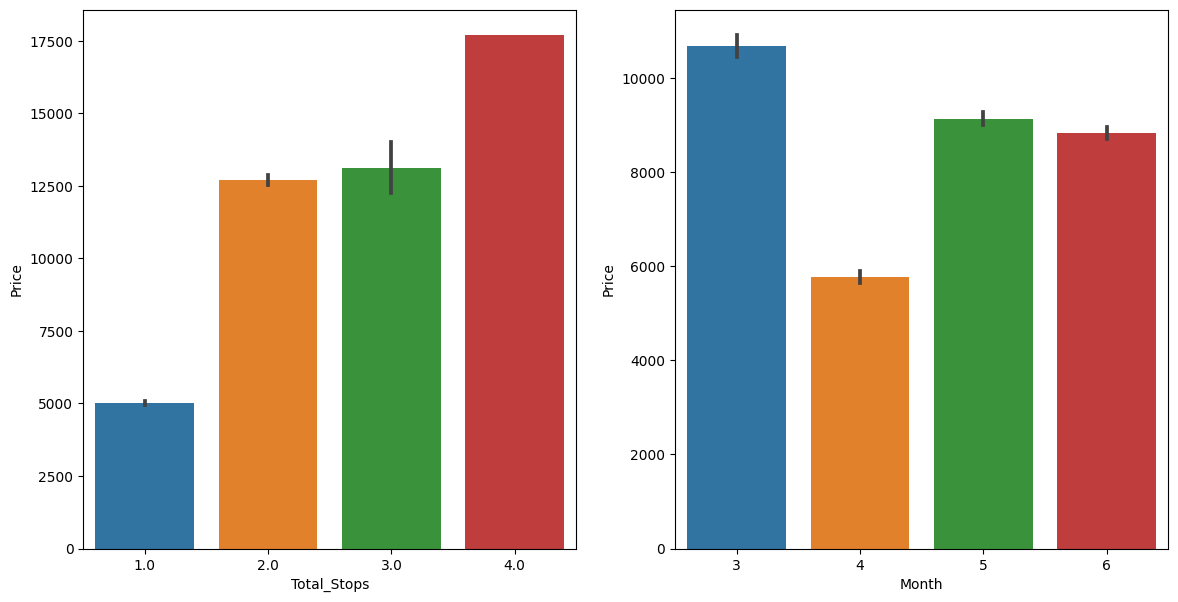

In [15]:
# Analyze the flight price 
plt.subplots( 1, 2, figsize = ( 14, 7 ) )

plt.subplot( 121 )
sns.barplot( data=df, y = 'Price', x = 'Total_Stops' )

plt.subplot( 122 )
sns.barplot( data=df, y = 'Price', x = 'Month' )


Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [16]:
# Features that we use Total stops / Month / Destination / Source and others feature we might use 

# Google Play Store

In [18]:
df = pd.read_csv( 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')       

In [19]:
df_copy = df

In [20]:
df.shape

(10841, 13)

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

 10841 rows and 13 columns 

In [21]:
df.head( 2 )

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [22]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [23]:
df[ 'Category' ].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<Axes: xlabel='Rating', ylabel='Category'>

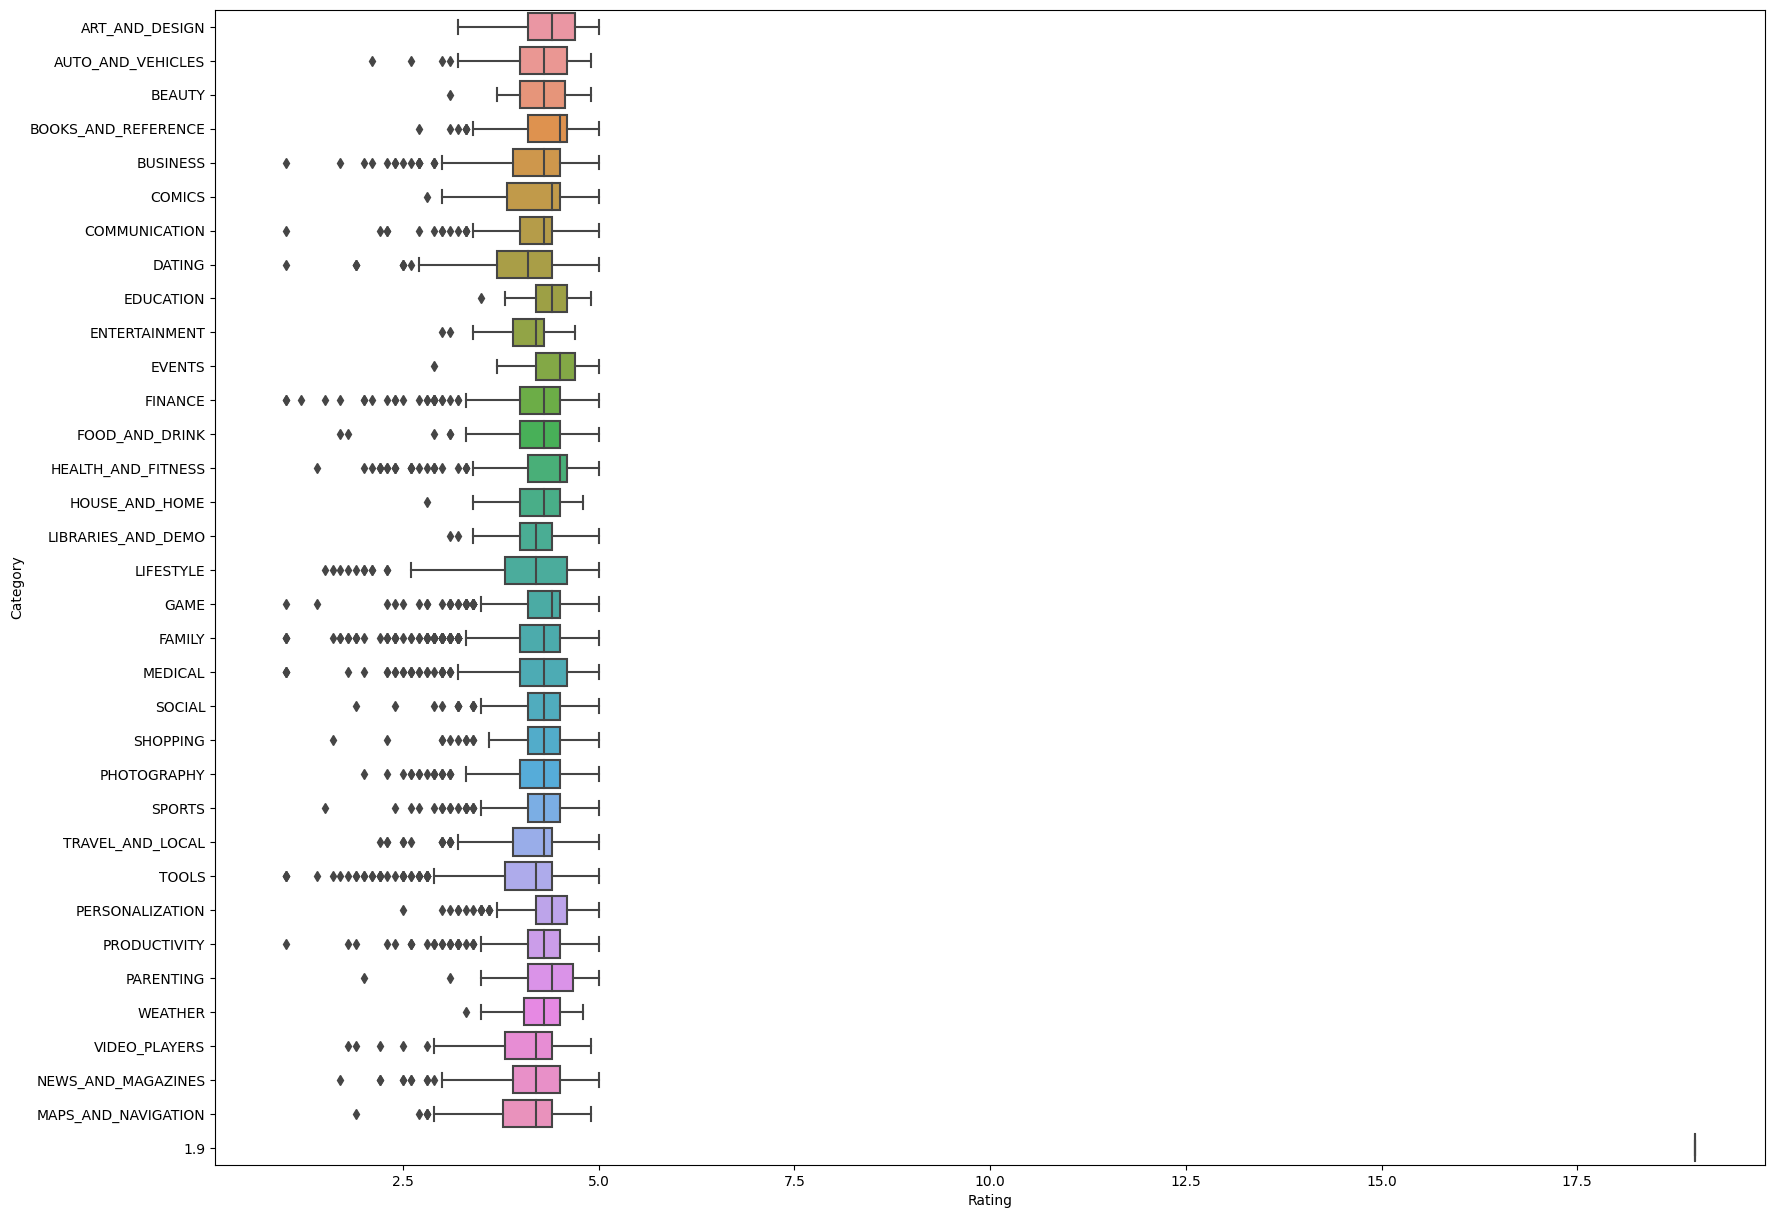

In [24]:
plt.figure( figsize=( 20, 15))
sns.boxplot( data = df, y = 'Category', x = 'Rating' )

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [26]:
# Check for missing values in the dataset 

df.isnull().sum()

# Ratings , Type , Content Rating , Current Ver , Andriod Ver contain NaN values. Affect the accuracy of the model.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [27]:
df.head( 2 )

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [28]:
df[ 'Size' ] =  df[ 'Size' ].str.replace( 'M', '000' )
df[ 'Size' ] =  df[ 'Size' ].str.replace( 'k', '' )
df[ 'Size' ] =  df[ 'Size' ].str.replace( 'Varies with device', '0' )
df[ 'Size' ] = df[ 'Size' ].str.replace( '1,000+', '1000')

In [29]:
df.drop( 10839, inplace=True) 

In [30]:
df[ 'Size' ] = df[ 'Size' ].astype( float ) # Convert to float 

<Axes: xlabel='Size', ylabel='Rating'>

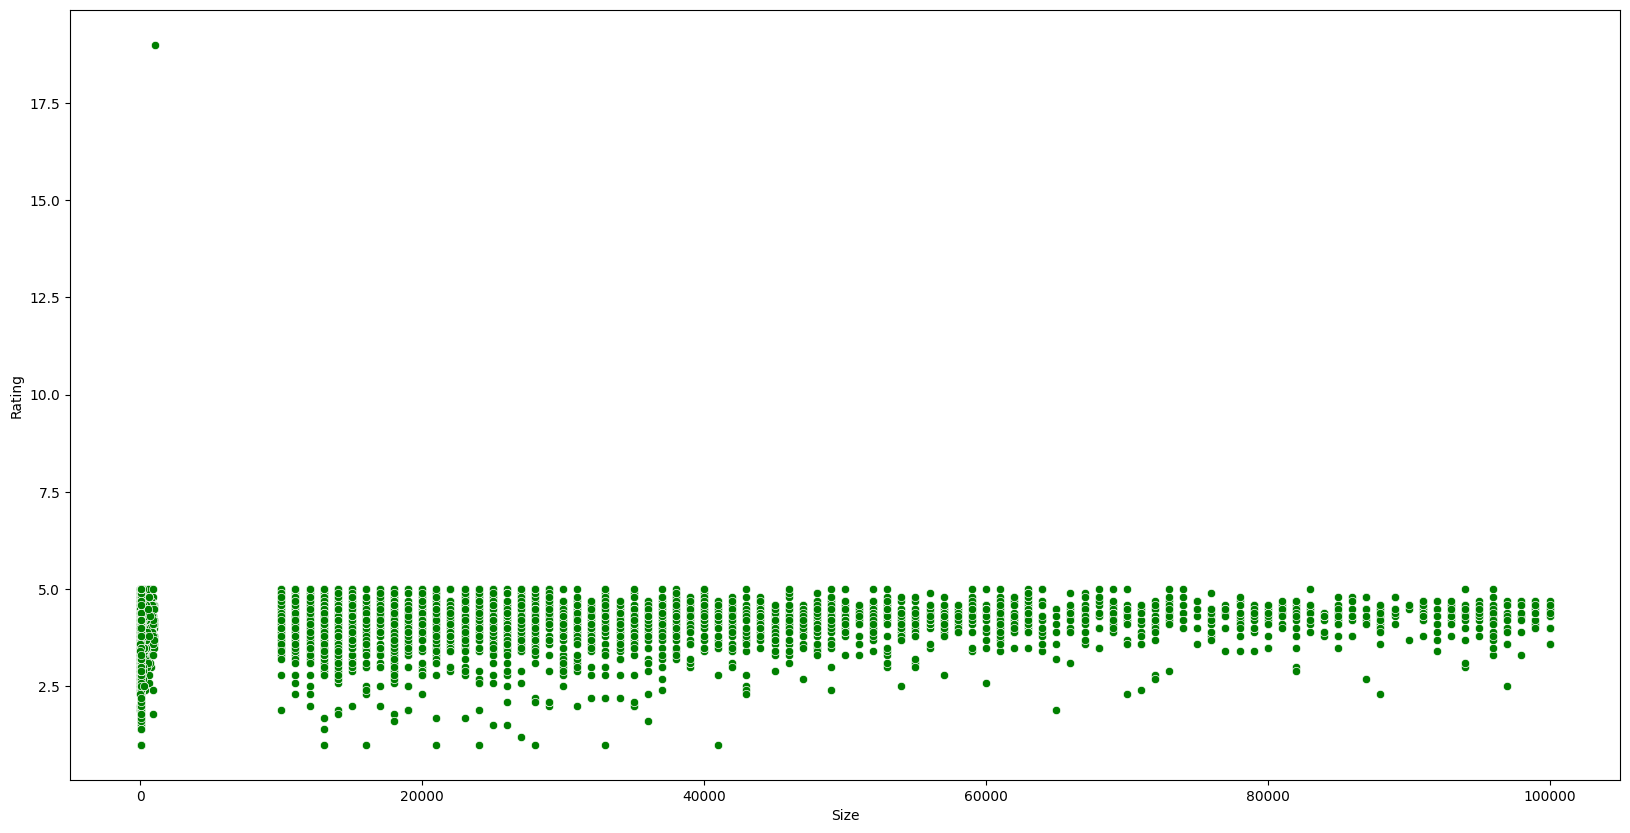

In [31]:
# Plotting an scatter plot 
plt.figure( figsize=( 20, 10 ))
sns.scatterplot( data = df, x = 'Size', y = 'Rating', color='g' )

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [32]:
df_copy[ 'Type' ].dropna( inplace = True)

In [33]:
df_copy[ 'Type' ].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [34]:
df_copy[ df_copy[ 'Type' ].isnull() ]
df_copy.drop( 9148, inplace=True  )

In [40]:
df_copy[ 'Type' ].unique()   

array(['Free', 'Paid', '0'], dtype=object)

In [41]:
df_copy[ 'New_Tye' ] =  df_copy[ 'Type' ].map( { 'Free': 'Free', 'Paid': 'Paid', '0': 'Free' } )

In [49]:
df_copy[ 'Price' ]

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10840    0
Name: Price, Length: 10839, dtype: object

In [61]:
# Perform data cleaning in price 
df_copy[ 'Price' ] =  df_copy[ 'Price' ].str.replace( '$', '')

In [62]:
df_copy[ 'Price' ].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [69]:
# Drop the 'Everyone' column
rows_to_drop = df_copy[ df_copy[ 'Price' ] == 'Everyone' ]

#df_copy.drop( df_copy[ 'Price' ] == 'Everyone', inplace=True )

df_copy.drop( rows_to_drop.index, inplace = True )

In [71]:
df_copy[ 'Price' ] = df_copy[ 'Price' ].astype(float)

<Axes: xlabel='Type', ylabel='Price'>

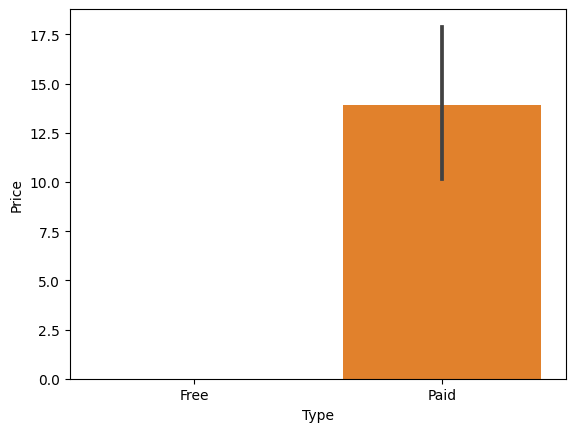

In [74]:
# Plotting a bar chart to show variation with price vs type 
sns.barplot( data = df_copy, x = 'Type', y = 'Price' )

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [82]:
# Finding the App which have highest no of installs 

# Removing the duplicate recored 
df_copy.drop_duplicates(inplace=True)

In [85]:
df_copy.head( 3 )

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Tye
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free


In [93]:
df_copy[ 'Installs' ].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             889
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Name: count, dtype: int64

In [ ]:
df_copy[ 'Installs' ] =  df_copy[ 'Installs'].str.split( '+' ).str[ 0 ]
df_copy[ 'Installs']  = df_copy[ 'Installs' ].str.replace( ',', '' ).astype( int )

In [125]:
df_copy[ 'Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10835          10
10836        5000
10837         100
10838        1000
10840    10000000
Name: Installs, Length: 10355, dtype: int32

In [123]:
## Freq table 
df_copy[ 'App' ].value_counts()

App
ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: count, Length: 9657, dtype: int64

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [126]:
## Finding the Most popular app categories 
df_copy.head( )

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Tye
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free


In [127]:
df_copy[ 'Category' ].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [134]:
category_df = pd.DataFrame(  df_copy[ 'Category' ].value_counts() )



category_df.reset_index()

category_top10 = category_df[ : 10 ]

In [140]:
category_top10.reset_index( inplace = True)

In [141]:
category_top10.columns

Index(['Category', 'count'], dtype='object')

<Axes: xlabel='Category', ylabel='count'>

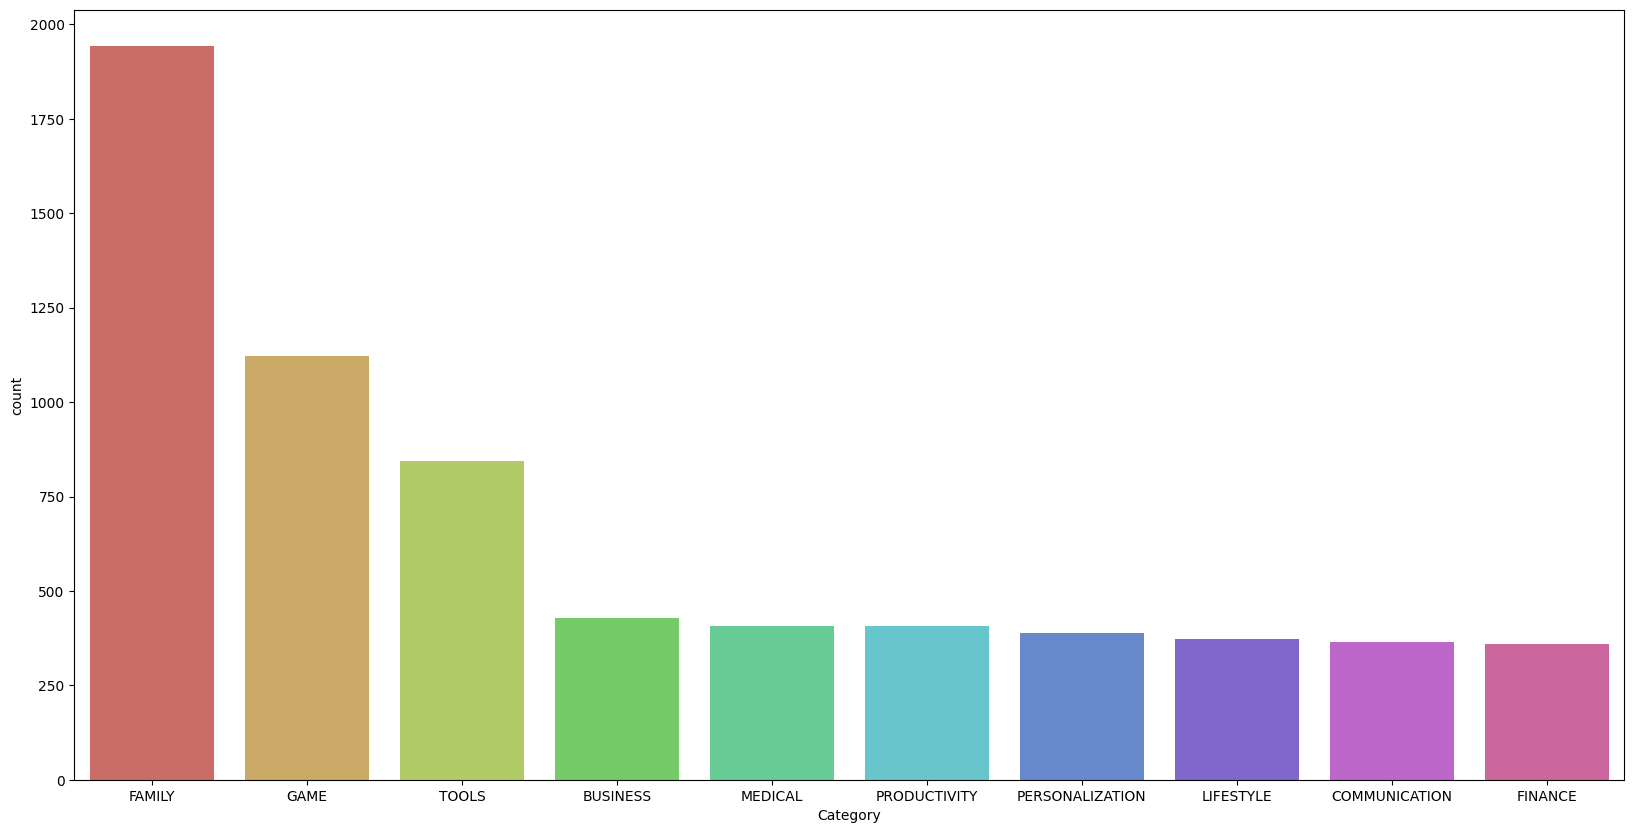

In [145]:
plt.figure( figsize = ( 20, 10 ))
sns.barplot( data = category_top10, x = 'Category', y = 'count', palette = 'hls' )

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

In [152]:
df_copy.drop_duplicates( keep='first', inplace=True )

In [158]:
# Most Successfull app developer whose install rate is max 
df_copy[ 'Installs' ].min()

0

In [162]:
max_down = df_copy[ df_copy[ 'Installs'] == df_copy[ 'Installs' ].max() ]

In [174]:
cleaned_max_data =  max_down.drop_duplicates( )

In [ ]:
cleaned_max_data[ 'Rating' ]

<Axes: xlabel='Rating', ylabel='App'>

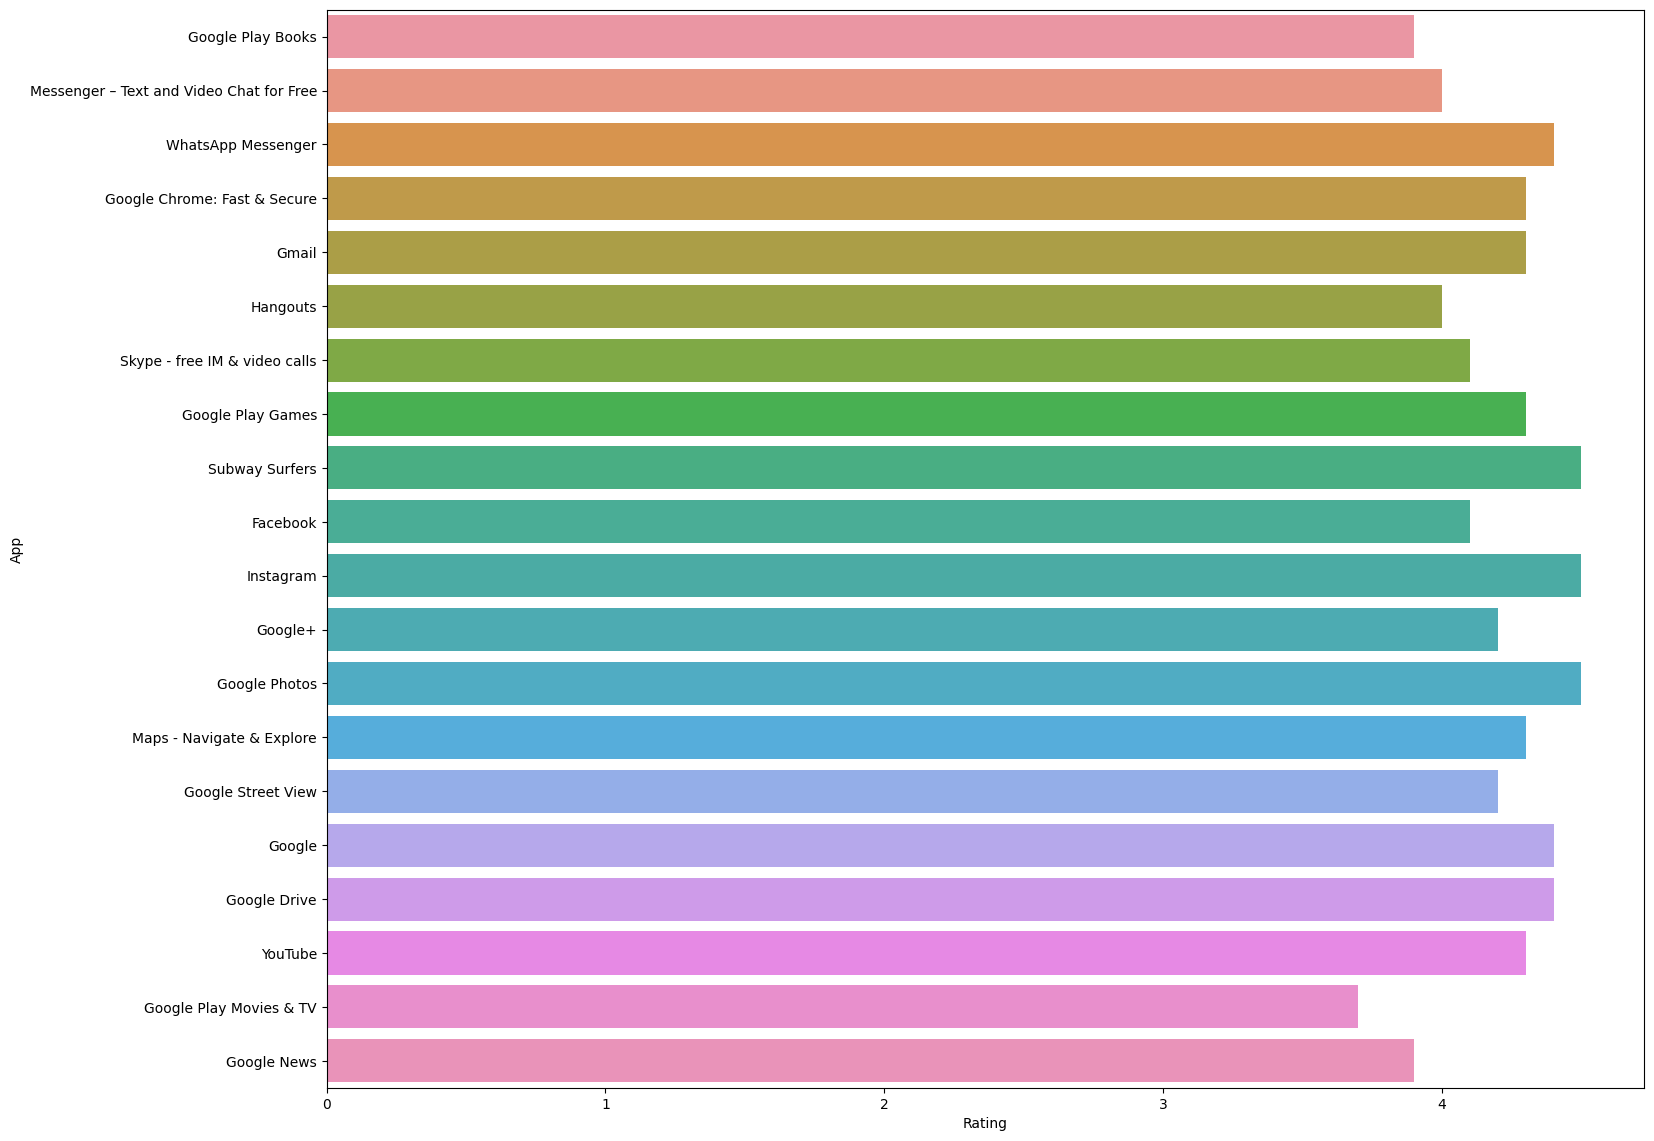

In [189]:
plt.figure( figsize=( 17, 14 ))
sns.barplot( data = cleaned_max_data, x = 'Rating', y = 'App')

In [160]:
df_copy.describe()

,Rating,Size,Installs,Price
count,8891.000000,10355.000000,1.035500e+04,10355.000000
mean,4.187842,16478.390594,1.416049e+07,1.031000
std,0.522396,23194.698593,8.024706e+07,16.280191
min,1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,3.200000,1.000000e+03,0.000000
50%,4.300000,241.000000,1.000000e+05,0.000000
75%,4.500000,26000.000000,1.000000e+06,0.000000
max,5.000000,100000.000000,1.000000e+09,400.000000


Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [ ]:
# Best time to lauch the app 

In [197]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Tye
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free


In [199]:
df_copy[ 'Last Updated' ] = pd.to_datetime( df_copy[ 'Last Updated'])

In [201]:
df_copy[ 'Day' ] = df_copy[ 'Last Updated' ].dt.day
df_copy[ 'Month' ] = df_copy[ 'Last Updated' ].dt.month
df_copy[ 'Year' ] = df_copy[ 'Last Updated' ].dt.year

In [207]:
month_app =  pd.DataFrame( df_copy[ 'Month' ].value_counts() )

month_app.reset_index( inplace = True )

In [208]:
month_app

,Month,count
0,7,2950
1,8,1466
2,6,1225
3,5,962
4,3,656
5,4,600
6,2,527
7,1,479
8,12,421
9,10,387


<Axes: xlabel='Month', ylabel='count'>

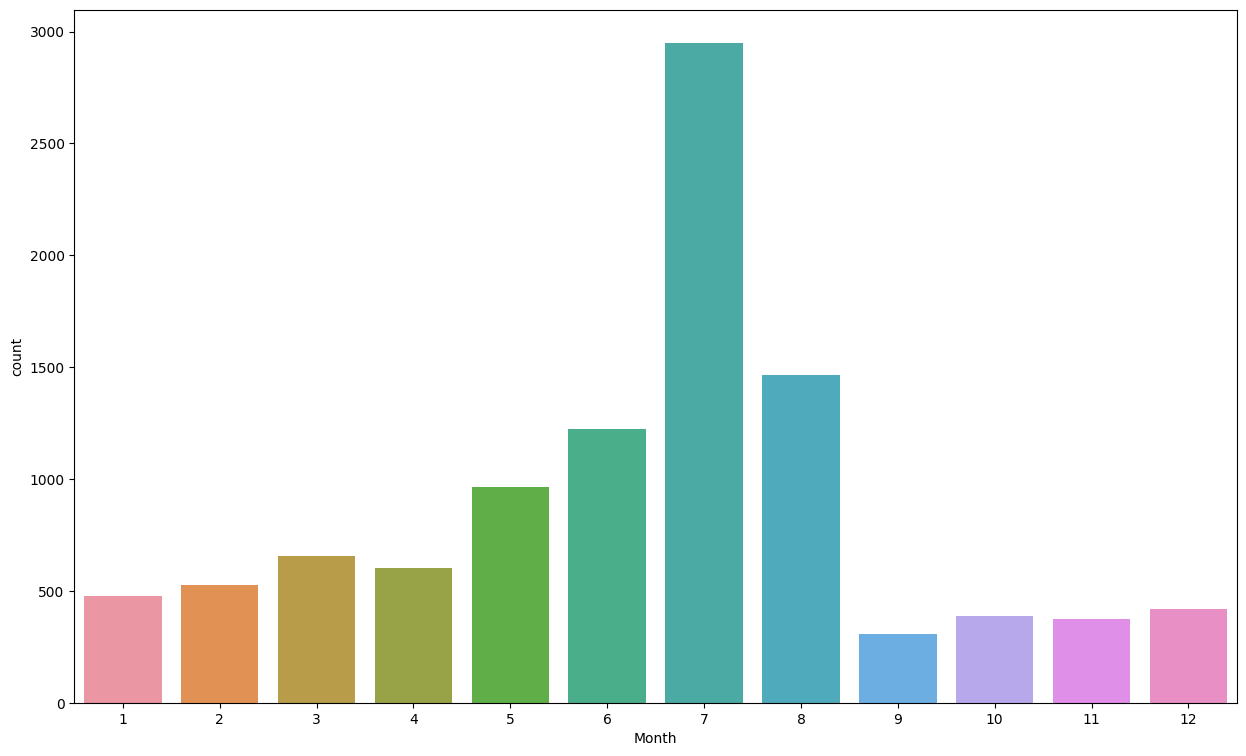

In [212]:
plt.figure( figsize=( 15, 9 ) )
sns.barplot( data = month_app, x = "Month", y = "count")